In [52]:
#Import all necessary modules
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
import copy
from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
df=pd.read_csv('Data_health.csv')

In [54]:
df.head(5)

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [55]:
pd.options.display.max_columns=None

In [56]:
df.head(5)

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [58]:
df.shape

(25000, 24)

In [59]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [60]:
nv=df.isnull().sum()
nv

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [61]:
nv[nv.values>0].sort_values(ascending=True)

bmi                     990
Year_last_admitted    11881
dtype: int64

In [62]:
nv


applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [63]:
df=df.drop(['Year_last_admitted'],axis=1)


In [64]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                      int64
dtype: object

In [65]:
df.isnull().sum()

applicant_id                        0
years_of_insurance_with_us          0
regular_checkup_lasy_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
dtype: int64

In [66]:
df.describe().insurance_cost

count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64

In [67]:
df['Occupation']=df['Occupation'].replace('Salried','Salaried')


In [68]:
df

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salaried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,29995,3,0,0,Salaried,4,225 to 250,5614,22,0,0,Male,145,36.1,smokes,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,0,Male,134,31.3,never smoked,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,1,Male,151,NaN,Unknown,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salaried,2,225 to 250,10777,27,0,0,Male,66,26.6,Unknown,Surat,74,N,Rare,Moderate,0,40,30850


In [69]:
df['Occupation'].value_counts()

Student     10169
Business    10020
Salaried     4811
Name: Occupation, dtype: int64

In [70]:
df.bmi.isnull().sum() * 100 / len(df.bmi)

3.96

In [71]:
df.drop('applicant_id', axis=1, inplace=True)

In [72]:
df.shape

(25000, 22)

In [73]:
k=df.loc[:,df.dtypes==object].columns.to_list()
k

['Occupation',
 'cholesterol_level',
 'Gender',
 'smoking_status',
 'Location',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise']

In [74]:
j=df.loc[:,df.dtypes!=object].columns.to_list()
j

['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'heart_decs_history',
 'other_major_decs_history',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'insurance_cost']

In [75]:
def univariateanalysis(column):
    print('Description of '+column)
    print('.................................................................')
    print(df[column].describe())
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    
    print(sns.distplot(df[column],kde=True,color='g'))
    plt.show()
   
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(df[column]))
    plt.show()

Description of years_of_insurance_with_us
.................................................................
count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: years_of_insurance_with_us, dtype: float64
.................................................................
Plot for years_of_insurance_with_us
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


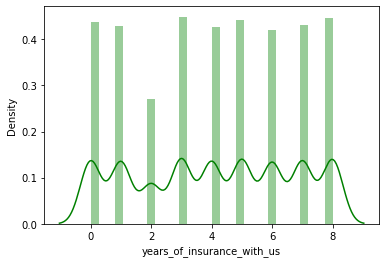

.................................................................
Plot for years_of_insurance_with_us
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


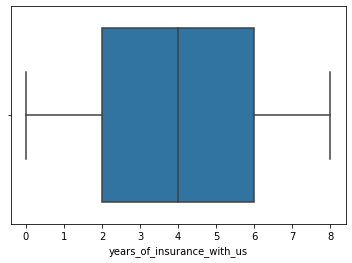

Description of regular_checkup_lasy_year
.................................................................
count    25000.000000
mean         0.773680
std          1.199449
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: regular_checkup_lasy_year, dtype: float64
.................................................................
Plot for regular_checkup_lasy_year
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


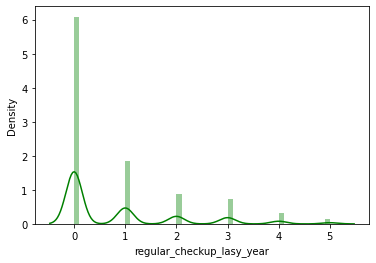

.................................................................
Plot for regular_checkup_lasy_year
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


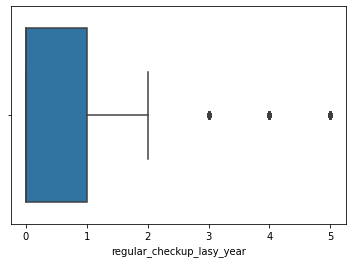

Description of adventure_sports
.................................................................
count    25000.000000
mean         0.081720
std          0.273943
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: adventure_sports, dtype: float64
.................................................................
Plot for adventure_sports
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


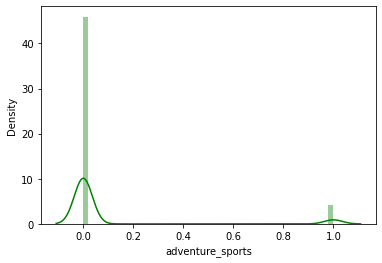

.................................................................
Plot for adventure_sports
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


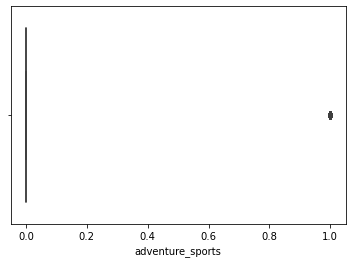

Description of visited_doctor_last_1_year
.................................................................
count    25000.000000
mean         3.104200
std          1.141663
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: visited_doctor_last_1_year, dtype: float64
.................................................................
Plot for visited_doctor_last_1_year
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


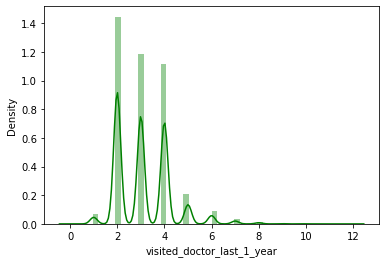

.................................................................
Plot for visited_doctor_last_1_year
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


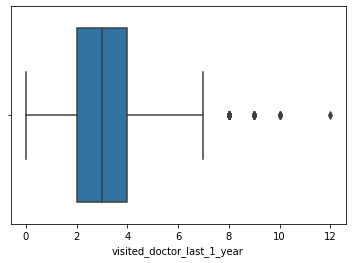

Description of daily_avg_steps
.................................................................
count    25000.000000
mean      5215.889320
std       1053.179748
min       2034.000000
25%       4543.000000
50%       5089.000000
75%       5730.000000
max      11255.000000
Name: daily_avg_steps, dtype: float64
.................................................................
Plot for daily_avg_steps
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


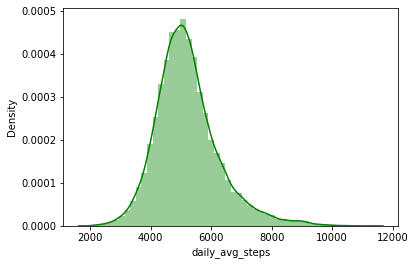

.................................................................
Plot for daily_avg_steps
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


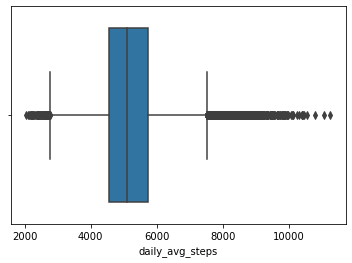

Description of age
.................................................................
count    25000.000000
mean        44.918320
std         16.107492
min         16.000000
25%         31.000000
50%         45.000000
75%         59.000000
max         74.000000
Name: age, dtype: float64
.................................................................
Plot for age
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


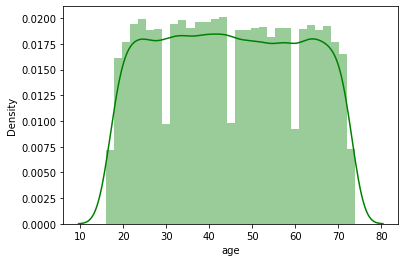

.................................................................
Plot for age
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


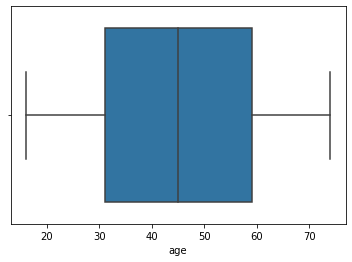

Description of heart_decs_history
.................................................................
count    25000.000000
mean         0.054640
std          0.227281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: heart_decs_history, dtype: float64
.................................................................
Plot for heart_decs_history
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


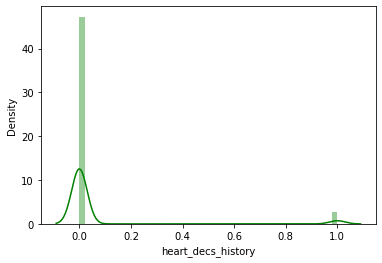

.................................................................
Plot for heart_decs_history
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


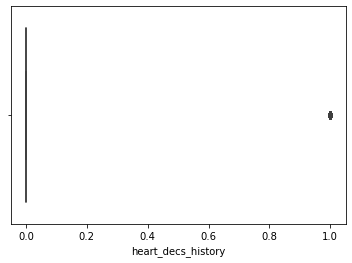

Description of other_major_decs_history
.................................................................
count    25000.000000
mean         0.098160
std          0.297537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: other_major_decs_history, dtype: float64
.................................................................
Plot for other_major_decs_history
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


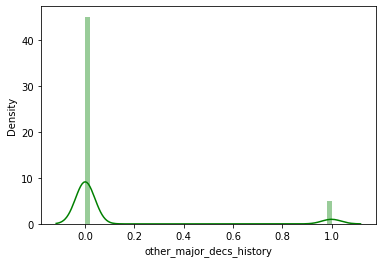

.................................................................
Plot for other_major_decs_history
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


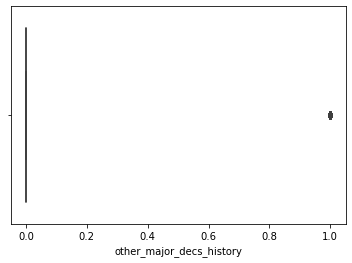

Description of avg_glucose_level
.................................................................
count    25000.000000
mean       167.530000
std         62.729712
min         57.000000
25%        113.000000
50%        168.000000
75%        222.000000
max        277.000000
Name: avg_glucose_level, dtype: float64
.................................................................
Plot for avg_glucose_level
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


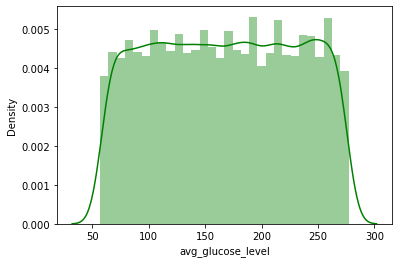

.................................................................
Plot for avg_glucose_level
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


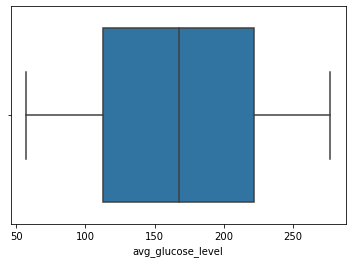

Description of bmi
.................................................................
count    24010.000000
mean        31.393328
std          7.876535
min         12.300000
25%         26.100000
50%         30.500000
75%         35.600000
max        100.600000
Name: bmi, dtype: float64
.................................................................
Plot for bmi
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


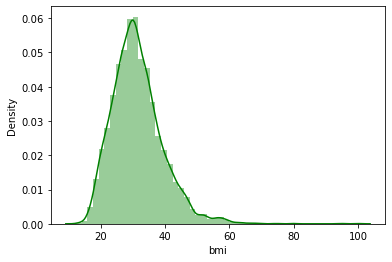

.................................................................
Plot for bmi
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


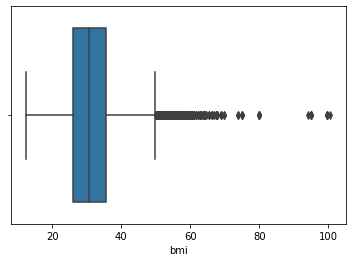

Description of weight
.................................................................
count    25000.000000
mean        71.610480
std          9.325183
min         52.000000
25%         64.000000
50%         72.000000
75%         78.000000
max         96.000000
Name: weight, dtype: float64
.................................................................
Plot for weight
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


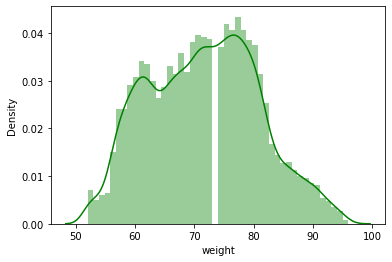

.................................................................
Plot for weight
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


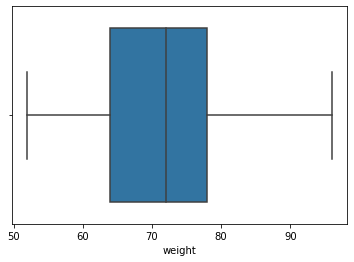

Description of weight_change_in_last_one_year
.................................................................
count    25000.000000
mean         2.517960
std          1.690335
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weight_change_in_last_one_year, dtype: float64
.................................................................
Plot for weight_change_in_last_one_year
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


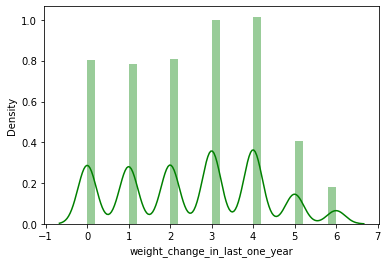

.................................................................
Plot for weight_change_in_last_one_year
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


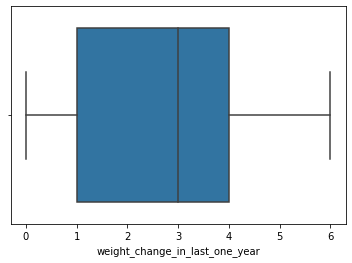

Description of fat_percentage
.................................................................
count    25000.000000
mean        28.812280
std          8.632382
min         11.000000
25%         21.000000
50%         31.000000
75%         36.000000
max         42.000000
Name: fat_percentage, dtype: float64
.................................................................
Plot for fat_percentage
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


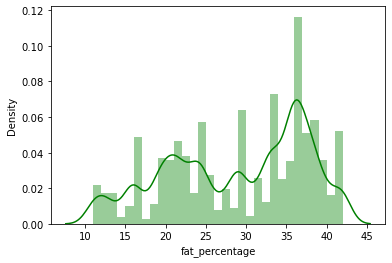

.................................................................
Plot for fat_percentage
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


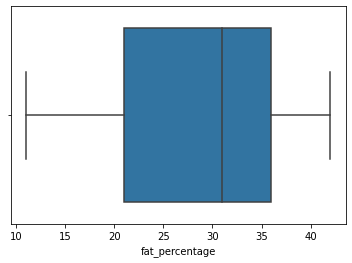

Description of insurance_cost
.................................................................
count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64
.................................................................
Plot for insurance_cost
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


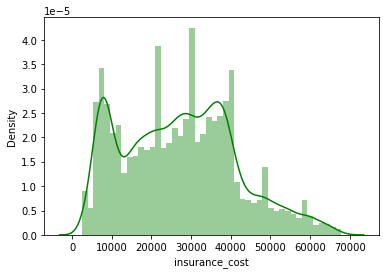

.................................................................
Plot for insurance_cost
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


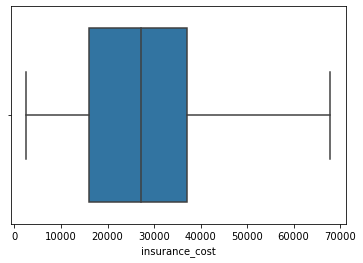

In [76]:
for i in j:
    univariateanalysis(i);

In [77]:
from sklearn.impute import KNNImputer

In [78]:
k=df.loc[:,df.dtypes==object].columns.to_list()
k

['Occupation',
 'cholesterol_level',
 'Gender',
 'smoking_status',
 'Location',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise']

In [79]:
df['Occupation']=pd.Categorical(df['Occupation']).codes

In [80]:
for i in k:
    df[i]=pd.Categorical(df[i]).codes

In [81]:
df.dtypes

years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                           int8
visited_doctor_last_1_year          int64
cholesterol_level                    int8
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                               int8
avg_glucose_level                   int64
bmi                               float64
smoking_status                       int8
Location                             int8
weight                              int64
covered_by_any_other_company         int8
Alcohol                              int8
exercise                             int8
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                      int64
dtype: object

In [82]:
df.bmi.isnull().sum()

990

In [83]:
from sklearn.impute import KNNImputer

In [84]:
imputer=KNNImputer(n_neighbors=3)

In [85]:
imputer.fit_transform(df)

array([[3.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 2.5000e+01,
        2.0978e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 2.7000e+01,
        6.1700e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.2000e+01,
        2.8382e+04],
       ...,
       [7.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 3.5000e+01,
        3.3318e+04],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 4.0000e+01,
        3.0850e+04],
       [8.0000e+00, 2.0000e+00, 0.0000e+00, ..., 4.0000e+00, 2.1000e+01,
        6.1700e+03]])

In [86]:
fd = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
fd

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3.0,1.0,1.0,1.0,2.0,0.0,4866.0,28.0,1.0,0.0,1.0,97.0,31.200000,0.0,3.0,67.0,0.0,2.0,1.0,1.0,25.0,20978.0
1,0.0,0.0,0.0,2.0,4.0,1.0,6411.0,50.0,0.0,0.0,1.0,212.0,34.200000,1.0,6.0,58.0,0.0,2.0,1.0,3.0,27.0,6170.0
2,1.0,0.0,0.0,0.0,4.0,3.0,4509.0,68.0,0.0,0.0,0.0,166.0,40.400000,1.0,6.0,73.0,0.0,0.0,0.0,0.0,32.0,28382.0
3,7.0,4.0,0.0,0.0,2.0,2.0,6214.0,51.0,0.0,0.0,0.0,109.0,22.900000,0.0,3.0,71.0,1.0,2.0,2.0,3.0,37.0,27148.0
4,3.0,1.0,0.0,2.0,2.0,1.0,4938.0,44.0,0.0,1.0,1.0,118.0,26.500000,2.0,1.0,74.0,0.0,1.0,0.0,0.0,34.0,29616.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3.0,0.0,0.0,1.0,4.0,4.0,5614.0,22.0,0.0,0.0,1.0,145.0,36.100000,3.0,7.0,79.0,1.0,2.0,1.0,4.0,40.0,39488.0
24996,6.0,0.0,0.0,0.0,4.0,3.0,4719.0,58.0,0.0,0.0,1.0,134.0,31.300000,2.0,7.0,66.0,0.0,2.0,1.0,2.0,28.0,14808.0
24997,7.0,0.0,1.0,2.0,2.0,1.0,5624.0,34.0,0.0,1.0,1.0,151.0,35.333333,0.0,2.0,76.0,0.0,2.0,1.0,1.0,35.0,33318.0
24998,1.0,0.0,0.0,1.0,2.0,4.0,10777.0,27.0,0.0,0.0,1.0,66.0,26.600000,0.0,14.0,74.0,0.0,2.0,1.0,0.0,40.0,30850.0


In [87]:
fd.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [88]:
#Treating Outliers
fd.loc[:,fd.dtypes!=object].columns.to_list()

['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'Occupation',
 'visited_doctor_last_1_year',
 'cholesterol_level',
 'daily_avg_steps',
 'age',
 'heart_decs_history',
 'other_major_decs_history',
 'Gender',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'Location',
 'weight',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'insurance_cost']

<AxesSubplot:xlabel='Location', ylabel='insurance_cost'>

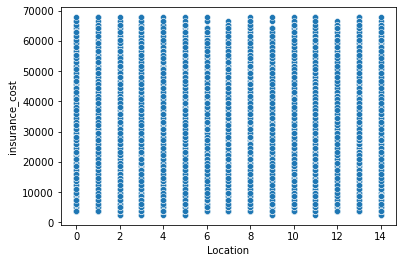

In [89]:
sns.scatterplot(x='Location',y='insurance_cost',data=df)

<AxesSubplot:xlabel='Gender', ylabel='insurance_cost'>

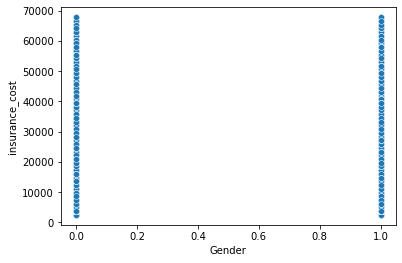

In [90]:
sns.scatterplot(x='Gender',y='insurance_cost',data=df)

<AxesSubplot:xlabel='weight_change_in_last_one_year', ylabel='insurance_cost'>

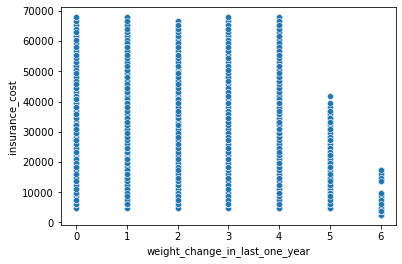

In [91]:
sns.scatterplot(x='weight_change_in_last_one_year',y='insurance_cost',data=df)

<AxesSubplot:xlabel='visited_doctor_last_1_year', ylabel='insurance_cost'>

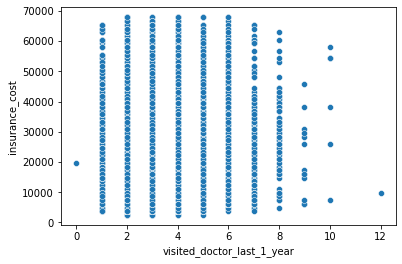

In [92]:
sns.scatterplot(x='visited_doctor_last_1_year',y='insurance_cost',data=df)

<AxesSubplot:xlabel='daily_avg_steps', ylabel='insurance_cost'>

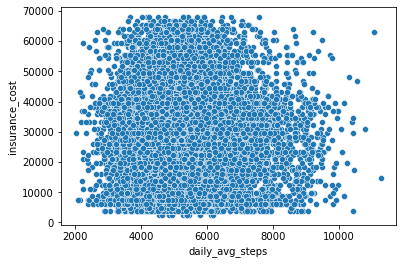

In [93]:
sns.scatterplot(x='daily_avg_steps',y='insurance_cost',data=df)

<AxesSubplot:xlabel='other_major_decs_history', ylabel='insurance_cost'>

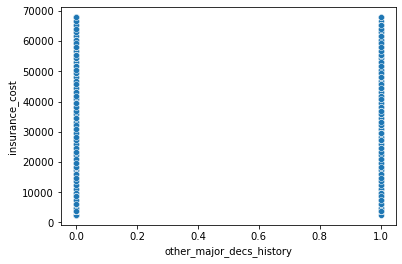

In [94]:
sns.scatterplot(x='other_major_decs_history',y='insurance_cost',data=df)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='insurance_cost'>

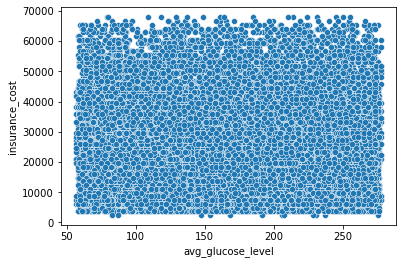

In [95]:
sns.scatterplot(x='avg_glucose_level',y='insurance_cost',data=df)

<AxesSubplot:xlabel='cholesterol_level', ylabel='insurance_cost'>

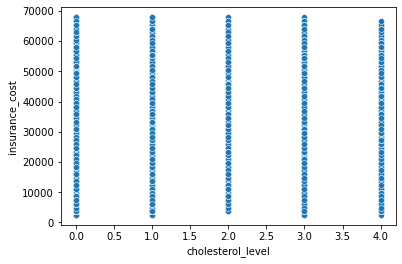

In [96]:
sns.scatterplot(x='cholesterol_level',y='insurance_cost',data=df)

<AxesSubplot:xlabel='fat_percentage', ylabel='insurance_cost'>

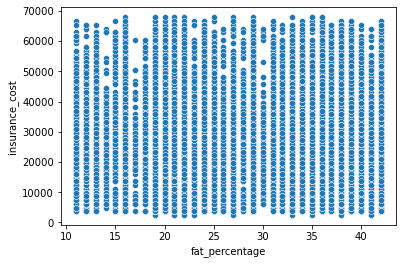

In [97]:
sns.scatterplot(x='fat_percentage',y='insurance_cost',data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='insurance_cost'>

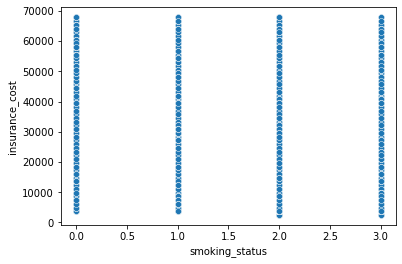

In [98]:
sns.scatterplot(x='smoking_status',y='insurance_cost',data=df)

<AxesSubplot:xlabel='regular_checkup_lasy_year', ylabel='insurance_cost'>

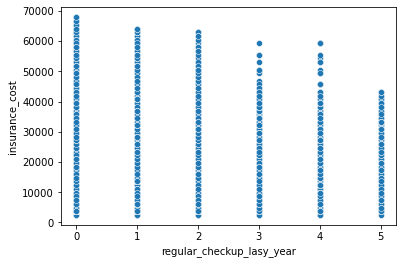

In [99]:
sns.scatterplot(x='regular_checkup_lasy_year',y='insurance_cost',data=df)

In [100]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [101]:
out=fd.loc[:,fd.dtypes!=object].columns.to_list()
out

['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'Occupation',
 'visited_doctor_last_1_year',
 'cholesterol_level',
 'daily_avg_steps',
 'age',
 'heart_decs_history',
 'other_major_decs_history',
 'Gender',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'Location',
 'weight',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'insurance_cost']

In [102]:
for column in out:
    lr,ur=remove_outlier(fd[column])
    fd[column]=np.where(fd[column]>ur,ur,fd[column])
    fd[column]=np.where(fd[column]<lr,lr,fd[column])
    

In [103]:
def univariateanalysis(column):
    print('Description of '+column)
    print('.................................................................')
    print(fd[column].describe())
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    
    print(sns.distplot(fd[column],kde=True,color='g'))
    plt.show()
   
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(fd[column]))
    plt.show()

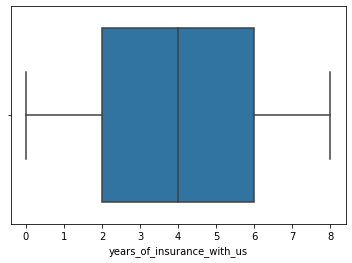

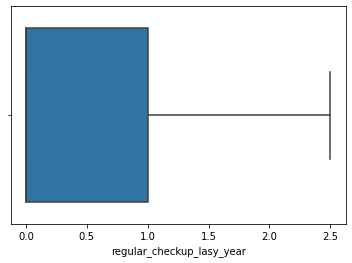

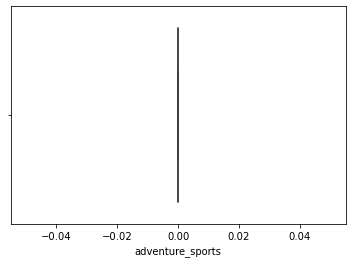

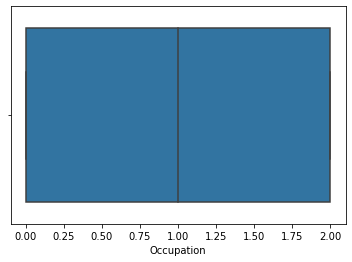

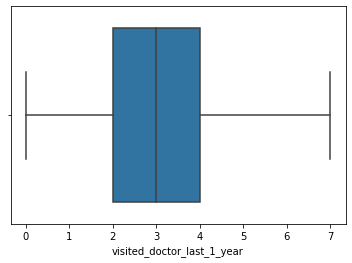

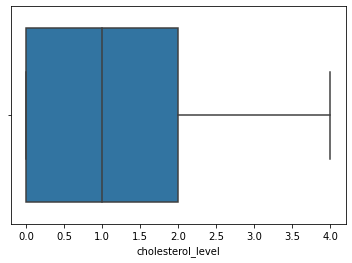

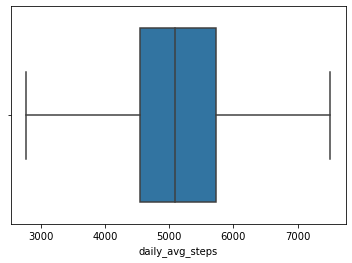

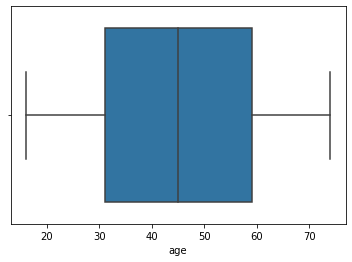

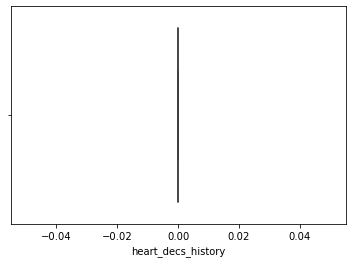

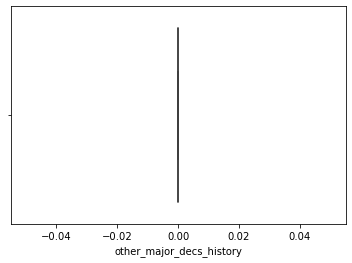

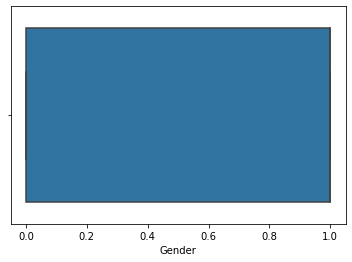

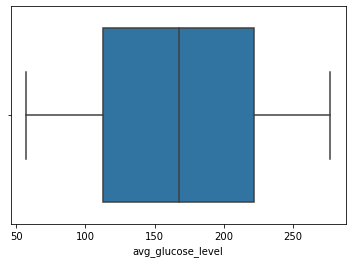

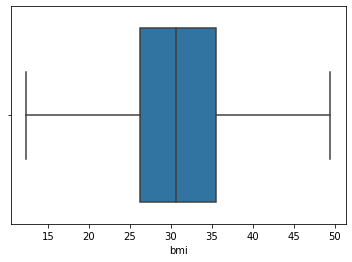

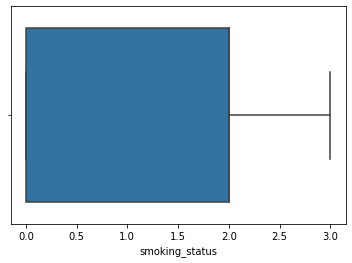

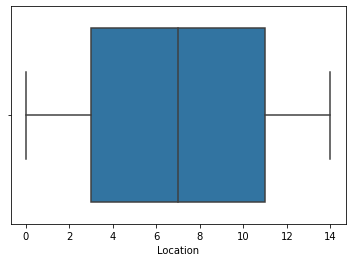

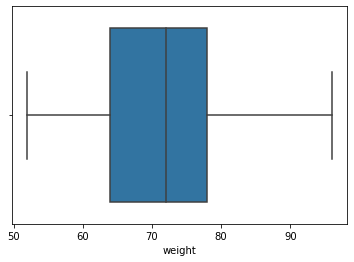

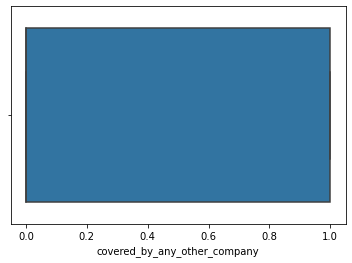

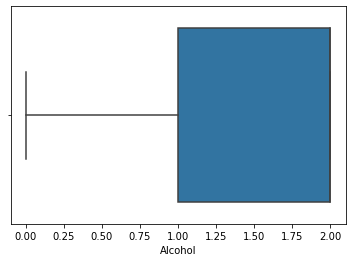

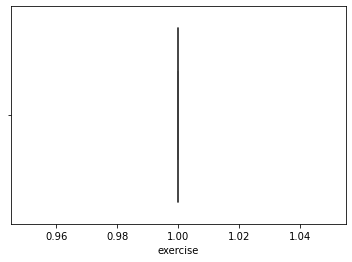

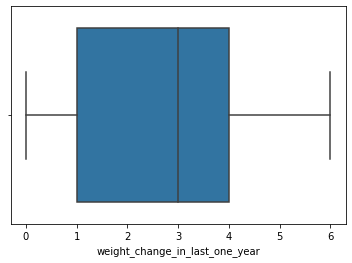

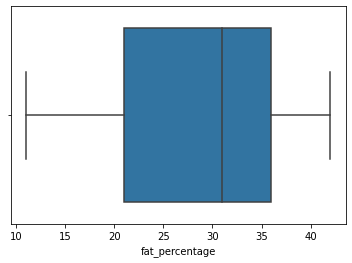

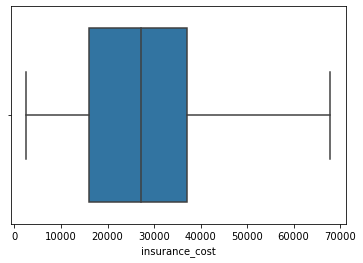

In [104]:
for i in out:
    sns.boxplot(fd[i])
    plt.show()

In [105]:
fd.skew()

years_of_insurance_with_us       -0.075217
regular_checkup_lasy_year         1.017634
adventure_sports                  0.000000
Occupation                       -0.011685
visited_doctor_last_1_year        0.803838
cholesterol_level                 0.827919
daily_avg_steps                   0.435063
age                               0.013860
heart_decs_history                0.000000
other_major_decs_history          0.000000
Gender                           -0.660933
avg_glucose_level                -0.006389
bmi                               0.453653
smoking_status                   -0.038978
Location                          0.016211
weight                            0.109077
covered_by_any_other_company      0.855960
Alcohol                          -0.819548
exercise                          0.000000
weight_change_in_last_one_year    0.068026
fat_percentage                   -0.363262
insurance_cost                    0.331650
dtype: float64

In [106]:
fd.Gender.value_counts()

1.0    16422
0.0     8578
Name: Gender, dtype: int64

In [107]:
df.Gender.value_counts()

1    16422
0     8578
Name: Gender, dtype: int64

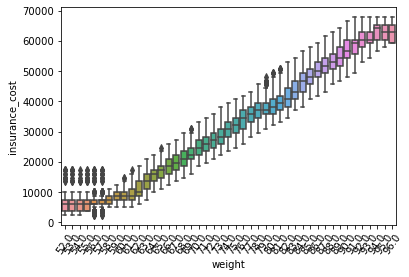

In [108]:
sns.boxplot(x='weight',y='insurance_cost',data=fd)
plt.xticks(rotation = 55);

<AxesSubplot:xlabel='weight', ylabel='insurance_cost'>

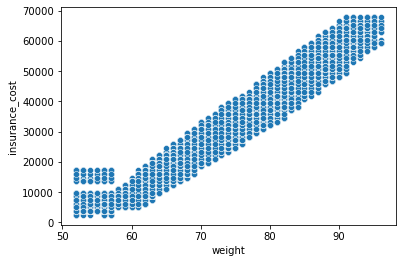

In [109]:
sns.scatterplot(x='weight',y='insurance_cost',data=fd)

<AxesSubplot:>

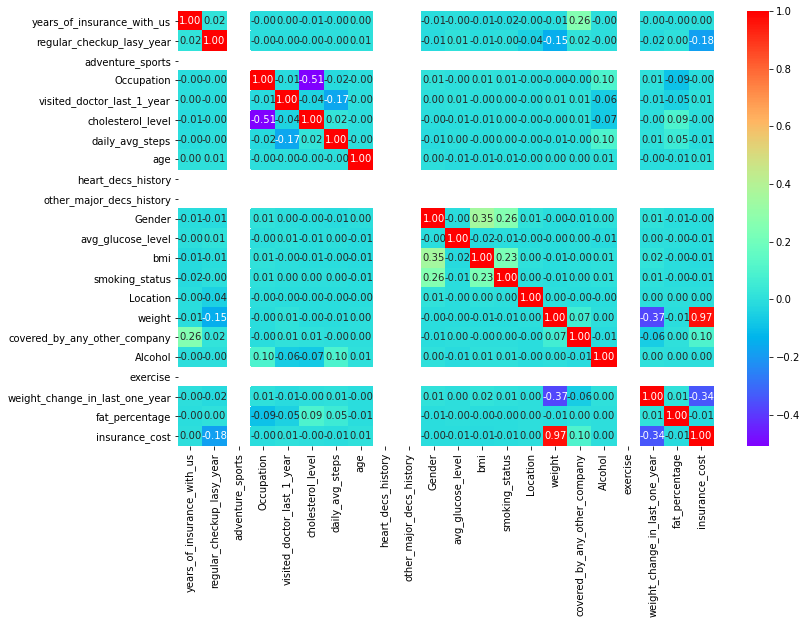

In [110]:
df_cor = fd.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='rainbow')

In [111]:
fd.dtypes

years_of_insurance_with_us        float64
regular_checkup_lasy_year         float64
adventure_sports                  float64
Occupation                        float64
visited_doctor_last_1_year        float64
cholesterol_level                 float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
Gender                            float64
avg_glucose_level                 float64
bmi                               float64
smoking_status                    float64
Location                          float64
weight                            float64
covered_by_any_other_company      float64
Alcohol                           float64
exercise                          float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
insurance_cost                    float64
dtype: object

In [112]:
data=fd

In [113]:
fd.dtypes

years_of_insurance_with_us        float64
regular_checkup_lasy_year         float64
adventure_sports                  float64
Occupation                        float64
visited_doctor_last_1_year        float64
cholesterol_level                 float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
Gender                            float64
avg_glucose_level                 float64
bmi                               float64
smoking_status                    float64
Location                          float64
weight                            float64
covered_by_any_other_company      float64
Alcohol                           float64
exercise                          float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
insurance_cost                    float64
dtype: object

In [114]:
data.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3.0,1.0,0.0,1.0,2.0,0.0,4866.0,28.0,0.0,0.0,1.0,97.0,31.2,0.0,3.0,67.0,0.0,2.0,1.0,1.0,25.0,20978.0
1,0.0,0.0,0.0,2.0,4.0,1.0,6411.0,50.0,0.0,0.0,1.0,212.0,34.2,1.0,6.0,58.0,0.0,2.0,1.0,3.0,27.0,6170.0
2,1.0,0.0,0.0,0.0,4.0,3.0,4509.0,68.0,0.0,0.0,0.0,166.0,40.4,1.0,6.0,73.0,0.0,0.0,1.0,0.0,32.0,28382.0
3,7.0,2.5,0.0,0.0,2.0,2.0,6214.0,51.0,0.0,0.0,0.0,109.0,22.9,0.0,3.0,71.0,1.0,2.0,1.0,3.0,37.0,27148.0
4,3.0,1.0,0.0,2.0,2.0,1.0,4938.0,44.0,0.0,0.0,1.0,118.0,26.5,2.0,1.0,74.0,0.0,1.0,1.0,0.0,34.0,29616.0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_lasy_year       25000 non-null  float64
 2   adventure_sports                25000 non-null  float64
 3   Occupation                      25000 non-null  float64
 4   visited_doctor_last_1_year      25000 non-null  float64
 5   cholesterol_level               25000 non-null  float64
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  float64
 8   heart_decs_history              25000 non-null  float64
 9   other_major_decs_history        25000 non-null  float64
 10  Gender                          25000 non-null  float64
 11  avg_glucose_level               25000 non-null  float64
 12  bmi                             

In [116]:
fd.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3.0,1.0,0.0,1.0,2.0,0.0,4866.0,28.0,0.0,0.0,1.0,97.0,31.2,0.0,3.0,67.0,0.0,2.0,1.0,1.0,25.0,20978.0
1,0.0,0.0,0.0,2.0,4.0,1.0,6411.0,50.0,0.0,0.0,1.0,212.0,34.2,1.0,6.0,58.0,0.0,2.0,1.0,3.0,27.0,6170.0
2,1.0,0.0,0.0,0.0,4.0,3.0,4509.0,68.0,0.0,0.0,0.0,166.0,40.4,1.0,6.0,73.0,0.0,0.0,1.0,0.0,32.0,28382.0
3,7.0,2.5,0.0,0.0,2.0,2.0,6214.0,51.0,0.0,0.0,0.0,109.0,22.9,0.0,3.0,71.0,1.0,2.0,1.0,3.0,37.0,27148.0
4,3.0,1.0,0.0,2.0,2.0,1.0,4938.0,44.0,0.0,0.0,1.0,118.0,26.5,2.0,1.0,74.0,0.0,1.0,1.0,0.0,34.0,29616.0


In [117]:
# Copy all the predictor variables into X dataframe
X = fd.drop('insurance_cost', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = fd[['insurance_cost']]
X.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage
0,3.0,1.0,0.0,1.0,2.0,0.0,4866.0,28.0,0.0,0.0,1.0,97.0,31.2,0.0,3.0,67.0,0.0,2.0,1.0,1.0,25.0
1,0.0,0.0,0.0,2.0,4.0,1.0,6411.0,50.0,0.0,0.0,1.0,212.0,34.2,1.0,6.0,58.0,0.0,2.0,1.0,3.0,27.0
2,1.0,0.0,0.0,0.0,4.0,3.0,4509.0,68.0,0.0,0.0,0.0,166.0,40.4,1.0,6.0,73.0,0.0,0.0,1.0,0.0,32.0
3,7.0,2.5,0.0,0.0,2.0,2.0,6214.0,51.0,0.0,0.0,0.0,109.0,22.9,0.0,3.0,71.0,1.0,2.0,1.0,3.0,37.0
4,3.0,1.0,0.0,2.0,2.0,1.0,4938.0,44.0,0.0,0.0,1.0,118.0,26.5,2.0,1.0,74.0,0.0,1.0,1.0,0.0,34.0


In [118]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)

In [119]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [120]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [121]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        3350.838143  3403.159671        0.945341    0.943381
Decision Tree Regressor     0.000000  4387.837481        1.000000    0.905876
Random Forest Regressor  1168.564425  3130.730755        0.993352    0.952083
ANN Regressor            3014.343961  3131.708038        0.955768    0.952053


In [81]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


In [82]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [84]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [85]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


using Grid Search for ANN

In [122]:
param_grid = {
    'hidden_layer_sizes':[(10),(10)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["relu"], 
    "solver": ["sgd"]}

annr = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [123]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=123),
             param_grid={'activation': ['relu'], 'hidden_layer_sizes': [10, 10],
                         'solver': ['sgd']})

In [124]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 10, 'solver': 'sgd'}


In [128]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=100)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=10,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

In [ ]:
#RMSE on Training data
from sklearn import metrics
from sklearn.metrics import mean_squared_error
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['insurance_cost'], y_pred)

In [ ]:
X_train.shape

In [ ]:
fd.isnull().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform (X_test)
y_train_scaled = sc.fit_transform (y_train)
y_test_scaled = sc.transform (y_test)

In [ ]:
X_train_scaled.shape

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
# R square on training data
regression_model.score(X_train_scaled, y_train_scaled)

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    #if i < 11:
        print (column ,"--->",  vif[i])
       # i = i+1

In [ ]:
X_train.shape

LINEAR REGRESSION USING STATS MODEL

In [ ]:
# Concat X and Y into single dataframe 
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+Occupation+visited_doctor_last_1_year+cholesterol_level+daily_avg_steps+age+heart_decs_history+other_major_decs_history+Gender+avg_glucose_level+bmi+smoking_status+Location+weight+covered_by_any_other_company+Alcohol+exercise+weight_change_in_last_one_year+fat_percentage', data = data_train).fit()
lm1.params

In [ ]:
print(lm1.summary())  #Inferential statistics

In [ ]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('insurance_cost',axis=1))-data_train['insurance_cost'])**2)
mse

In [ ]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('insurance_cost',axis=1))-data_test['insurance_cost'])**2)

In [ ]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)


In [ ]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

In [ ]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

In [ ]:
plt.scatter(y_test['insurance_cost'], y_pred)
plt.show()

In [ ]:
X_train.shape

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

regularized RIDGE model and note the coefficients

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

In [ ]:
X_train.shape

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))

In [ ]:
X_train.shape

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_train.shape

In [ ]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

In [ ]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

In [ ]:
X_train.shape

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

In [ ]:
X.shape

In [ ]:
X_train.shape

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

# define the model
model = AdaBoostRegressor()
# evaluate the model
model.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [ ]:
X_train.shape

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
model.score(X_test,y_test)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# evaluate the model
model.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
model.score(X_test,y_test)